In [10]:
import numpy as np
from numpy.linalg import norm
from pymatgen.io.vasp import Poscar
from pymatgen.symmetry.bandstructure import HighSymmKpath 
from pymatgen.electronic_structure.plotter import plot_brillouin_zone_from_kpath

In [9]:
#poscar = Poscar.from_file('/Users/yao/Downloads/POSCAR.mp-614013_CsSnI3')
poscar = Poscar.from_file('/Users/yao/Downloads/Cs2SnI6_mp-27636_primitive.vasp')
struct = poscar.structure
ibz = HighSymmKpath(struct, symprec=0.01, angle_tolerance=5)
ibz.kpath


{'kpoints': {'K': array([ 0.375,  0.375,  0.75 ]),
  'L': array([ 0.5,  0.5,  0.5]),
  'U': array([ 0.625,  0.25 ,  0.625]),
  'W': array([ 0.5 ,  0.25,  0.75]),
  'X': array([ 0.5,  0. ,  0.5]),
  '\\Gamma': array([ 0.,  0.,  0.])},
 'path': [['\\Gamma', 'X', 'W', 'K', '\\Gamma', 'L', 'U', 'W', 'L', 'K'],
  ['U', 'X']]}

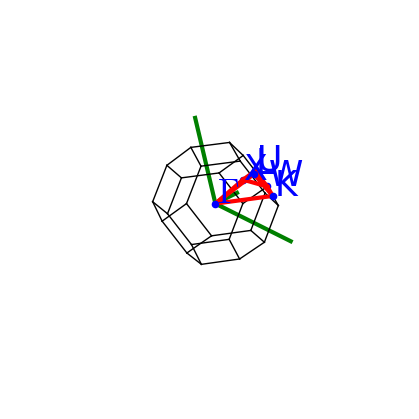

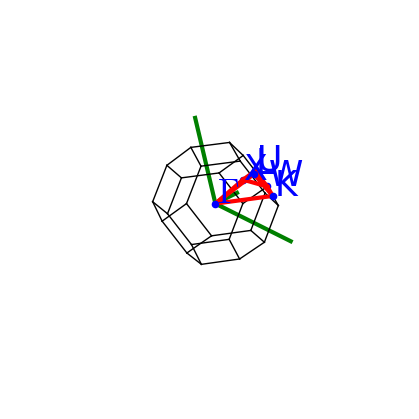

In [11]:
plot_brillouin_zone_from_kpath(ibz)

In [6]:
#path = [u'W',u'L',u'\\Gamma',u'X',u'W',u'K'] silicon
#path = [u'\\Gamma', u'X', u'M', u'R', u'\\Gamma'] CsSnI3
path = [u'\\Gamma', u'L', u'W', u'X', u'\\Gamma',u'K'] #Cs2SnI6
n = 200
k_num = np.zeros(len(path))
total_k_length = 0
for i in range(len(path)-1):
    total_k_length = total_k_length+norm(ibz.kpath['kpoints'][path[i]]-ibz.kpath['kpoints'][path[i+1]])
density = total_k_length/n
density
for i in range(len(path)-2):
    k_num[i] = np.ceil(norm(ibz.kpath['kpoints'][path[i]]-ibz.kpath['kpoints'][path[i+1]])/density)
k_num[-2]=n-1
for i in range(len(path)-2):
    k_num[-2] = k_num[-2]-k_num[i]
k_num[-1] = 0

print('K_POINTS crystal_b')
print(len(path))
for i in range(len(path)):
    print(ibz.kpath['kpoints'][path[i]][0], ibz.kpath['kpoints'][path[i]][1],
          ibz.kpath['kpoints'][path[i]][2], int(k_num[i]))

K_POINTS crystal_b
6
0.0 0.0 0.0 55
0.5 0.5 0.5 23
0.5 0.25 0.75 23
0.5 0.0 0.5 45
0.0 0.0 0.0 53
0.375 0.375 0.75 0
